In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor

In [2]:
import pandas as pd
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")




In [3]:
#결측치 확인
print('Train shape:', train.shape)
print('Test shape: ', test.shape)

print('\n--- Train dtypes ---')
print(train.dtypes)

print('\n--- Top 10 Missing Rates ---')
print(train.isna().mean().sort_values(ascending=False).head(10))




Train shape: (4376, 14)
Test shape:  (1755, 13)

--- Train dtypes ---
ID                 object
설립연도                int64
국가                 object
분야                 object
투자단계               object
직원 수              float64
인수여부               object
상장여부               object
고객수(백만명)          float64
총 투자금(억원)         float64
연매출(억원)           float64
SNS 팔로워 수(백만명)    float64
기업가치(백억원)          object
성공확률              float64
dtype: object

--- Top 10 Missing Rates ---
고객수(백만명)     0.301645
기업가치(백억원)    0.278793
분야           0.195841
직원 수         0.039762
설립연도         0.000000
ID           0.000000
투자단계         0.000000
국가           0.000000
상장여부         0.000000
인수여부         0.000000
dtype: float64


In [19]:
# 타깃 분포
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(6,4))
sns.histplot(train['성공확률'], bins=9)
plt.title('성공확률 분포')
plt.xlabel('성공확률')
plt.ylabel('Count')
plt.show()


NameError: name 'fm' is not defined

In [18]:
# 3) 이상치 탐색 (IQR 기반)
num_cols = train.select_dtypes(include=['int64','float64']).columns.drop('성공확률')
outlier_records = []
for col in num_cols:
    Q1, Q3 = train[col].quantile([0.25,0.75])
    IQR    = Q3 - Q1
    lower  = Q1 - 1.5*IQR
    upper  = Q3 + 1.5*IQR
    pct    = ((train[col] < lower) | (train[col] > upper)).mean()
    outlier_records.append((col, lower, upper, pct))

outlier_df = pd.DataFrame(outlier_records,
                          columns=['Column','Lower','Upper','OutlierPct'])
print('\n--- Outlier Detection ---')
print(outlier_df)



--- Outlier Detection ---
           Column     Lower      Upper  OutlierPct
0            설립연도  1988.000   2036.000         0.0
1            직원 수 -2545.625   7491.375         0.0
2        고객수(백만명)   -40.500    139.500         0.0
3       총 투자금(억원) -3233.625   9793.375         0.0
4         연매출(억원) -6803.125  19589.875         0.0
5  SNS 팔로워 수(백만명)    -2.700      8.020         0.0


Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/lo

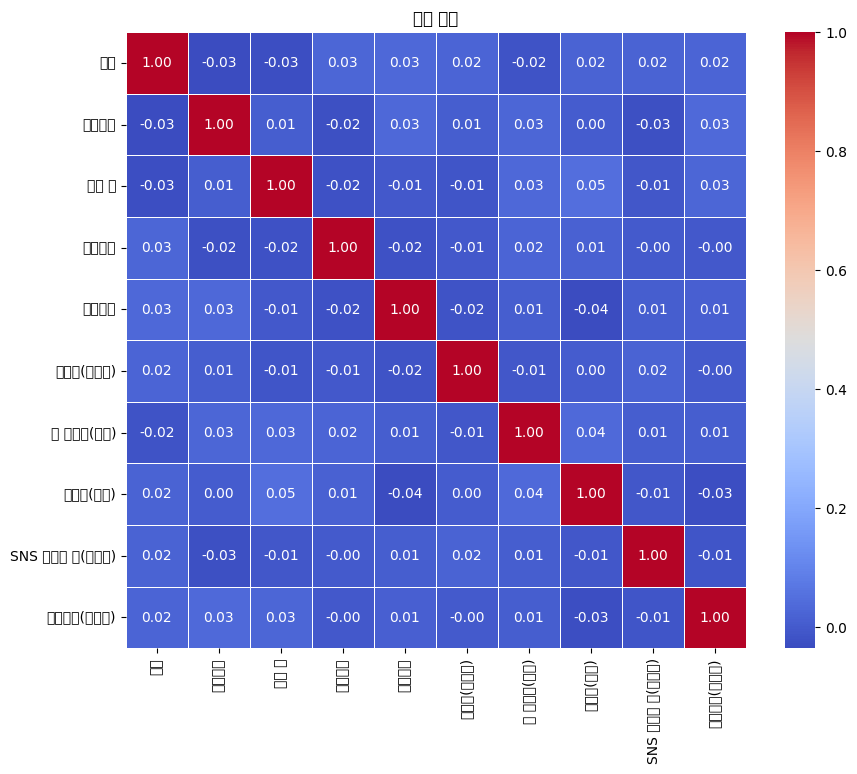

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설치
!apt-get -qq -y install fonts-nanum

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname=font_path)

# 폰트 적용
plt.rc('font', family=fontprop.get_name())
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 제대로 표시

# 상관 행렬 시각화 (히트맵)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('상관 행렬')  # 한글 제목
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/lo

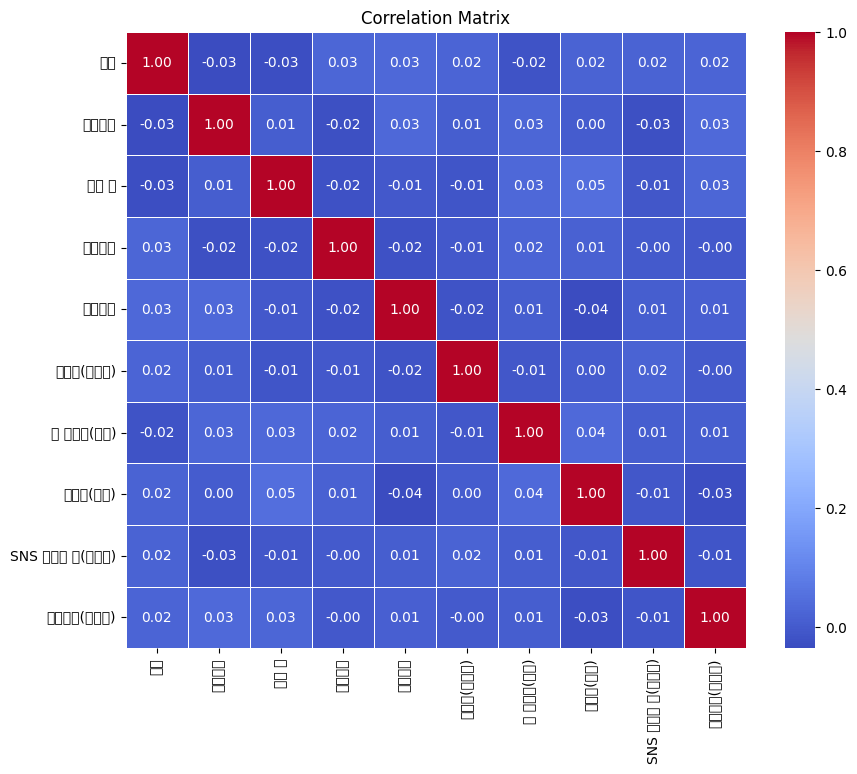

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
train = pd.read_csv('/train.csv')

# 사용할 변수만 선택
features = ['분야', '투자단계', '직원 수', '인수여부', '상장여부', '고객수(백만명)',
            '총 투자금(억원)', '연매출(억원)', 'SNS 팔로워 수(백만명)', '기업가치(백억원)', '성공확률']

train = train[features]

# '성공확률'을 타겟 변수로 분리
X_train = train.drop(columns=['성공확률'])
y_train = train['성공확률']

# 범위 값 중간값으로 변환하는 함수 (6000이상 처리)
def convert_to_median_range(x):
    if isinstance(x, str) and '-' in x:
        # 범위 값을 '-'로 분리하고, 중간값을 계산
        low, high = x.split('-')
        return (int(low) + int(high)) / 2
    elif isinstance(x, str) and '이상' in x:
        # '6000이상' 같은 경우는 최대값과 평균값으로 변환
        high = x.replace('이상', '')
        return (int(high) + 6000) / 2  # 예: 6000 이상 -> 평균값을 6000 + 6000으로 설정
    try:
        return float(x)
    except ValueError:
        return x  # 수치형 데이터는 그대로 반환

# '직원 수'와 '기업가치'에서 범위 값을 중간값으로 계산한 열 생성
X_train['직원 수'] = X_train['직원 수'].apply(lambda x: convert_to_median_range(x) if pd.notna(x) else x)
X_train['기업가치(백억원)'] = X_train['기업가치(백억원)'].apply(lambda x: convert_to_median_range(x) if pd.notna(x) else x)

# 범주형 변수들에 대해 라벨 인코딩
label_encoder = LabelEncoder()
categorical_columns = ['분야', '투자단계', '인수여부', '상장여부']

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col].astype(str))

# 결측값 처리: 수치형 변수에 대해 결측값이 있을 경우 중앙값으로 채우기
X_train.fillna(X_train.median(), inplace=True)

# 수치형 변수만 선택
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# 상관계수 계산
correlation_matrix = X_train_numeric.corr()

# 상관 행렬 시각화 (히트맵)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



분야-투자관계 -0.03
분야-직원수 -0.03
분야-인수여부 0.03
분야-상장여부 0.03
분야-고객수 0.02
분야-총 투자금 -0.02
분야-연매출 0.02
분야-sns 0.02
분야-기업가치 0.02  :

투자단계-직원수 0.01
투자단계-인수여부 -0.02
투자단계-상장여부 0.03
투자단계-고객수 0.01
투자단계-총 투자금 0.03
투자단계-연매출 0.00
투자단계-sns  -0.03
투자단계-0.03

직원수-인수여부 -0.02
직원수-상장여부 -0.01
직원수-고객수 -0.01
직원수-투자금 0.03
직원수-연매출 0.05
직원수-sns -0.01
직원수-기업가치 0.03

인수여부-상장여부 -0.02
인수여부-고객수 -0.01
인수여부-투자금 0.02
인수여부-연매출 0.01
인수여부-sns 0
인수여부-기업가치0

상장여부-고객수 -0.02
상장여부-투자금 0.01
상장여부-연매출 -0.04
상장여부-sns 0.01
상장여부-기업가치0.01

고객수-투자금 -0.01
고객수-연매출 0
고객수-sns 0.02
고객수-기업가치 0

투자금-연매출0.04
투자금-sns 0.01
투자금-기업가치 0.01

연매출-sns -0.01
연매출-기업가치-0.03

sns-기업가치 -0.01


In [30]:
#연매출에 따른 직원수 결측값 채우기
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 로드
train = pd.read_csv('/content/train.csv')

# 연매출에 따른 직원 수 예측
def fill_missing_with_regression(X_train, target_column, feature_columns):
    model = LinearRegression()

    # 결측값이 아닌 데이터로 학습
    train_data = X_train[X_train[target_column].notna()]

    if len(train_data) > 0:  # 학습할 데이터가 있는 경우에만 학습
        model.fit(train_data[feature_columns], train_data[target_column])
        # 결측값을 예측하여 채움
        missing_data = X_train[X_train[target_column].isna()]
        predicted_values = model.predict(missing_data[feature_columns])
        X_train.loc[X_train[target_column].isna(), target_column] = predicted_values
    else:
        print(f"No training data available for {target_column}")

    return X_train

# 연매출에 따른 직원 수 예측 (직원 수 결측값만 처리)
train = fill_missing_with_regression(train, '직원 수', ['연매출(억원)'])

# 결과 확인
train

,ID,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,TRAIN_0000,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,TRAIN_0001,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8
2,TRAIN_0002,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5
3,TRAIN_0003,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,TRAIN_0004,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,TRAIN_4371,2021,CT006,푸드테크,Series A,4841.0,Yes,No,90.0,4187.0,9394.0,4.00,1500-2500,0.8
4372,TRAIN_4372,2020,CT003,에너지,Series B,555.0,No,Yes,37.0,796.0,2969.0,3.00,6000이상,0.4
4373,TRAIN_4373,2023,CT004,NaN,Series C,506.0,No,Yes,NaN,3314.0,4512.0,1.47,NaN,0.6
4374,TRAIN_4374,2001,CT007,AI,IPO,1438.0,No,No,53.0,2395.0,3755.0,5.00,4500-6000,0.9


In [5]:
# 4) 가중치 생성 (정답값 빈도 기반)
counts = train['성공확률'].value_counts()
train['weight'] = train['성공확률'].map(lambda y: 1 / counts[y])
train['weight'] /= train['weight'].mean()  # 평균=1 정규화

print('\n가중치 분포 미리보기:')
print(train['weight'].describe())


가중치 분포 미리보기:
count    4376.000000
mean        1.000000
std         0.074566
min         0.927119
25%         0.944732
50%         0.975045
75%         0.998175
max         1.151579
Name: weight, dtype: float64


In [6]:
# 5) Weighted MAE 함수 정의 및 테스트
def weighted_mae(y_true, y_pred, w):
    return np.sum(w * np.abs(y_true - y_pred)) / np.sum(w)

In [32]:
# 6) 베이스라인 모델링 & 5-Fold CV
X = train.drop(columns=['성공확률','weight'])
y = train['성공확률']
w = train['weight']

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

model = Pipeline([
    ('pre', preprocessor),
    ('lgb', LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for tr_idx, va_idx in kf.split(X):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    w_tr, w_va = w.iloc[tr_idx], w.iloc[va_idx]

    model.fit(X_tr, y_tr, lgb__sample_weight=w_tr)
    preds = model.predict(X_va)

    scores.append(weighted_mae(y_va, preds, w_va))

print('\nCV Weighted MAE scores:', scores)
print('Mean CV Weighted MAE:', np.mean(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 36
[LightGBM] [Info] Start training from score 0.534428


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.537395


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.537444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1593
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.538242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.539989

CV Weighted MAE scores: [np.float64(0.21386166036818852), np.float64(0.21553077891490177), np.float64(0.21288492708233858), np.float64(0.21683769712461648), np.float64(0.21084662723087622)]
Mean CV Weighted MAE: 0.2139923381441843


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
# 전체 학습
model.fit(X, y, lgb__sample_weight=w)
# 예측
preds = model.predict(test)
# 클리핑 & 반올림 (0.1 단위)
preds = np.clip(preds, 0.1, 0.9).round(1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1198
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 40
[LightGBM] [Info] Start training from score 0.537500


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [20]:
# submission 파일
submission = pd.DataFrame({
    'ID': test['ID'],
    '성공확률': preds
})
submission.to_csv('submission_1.csv', index=False)
print("submission_1.csv 생성 완료")

submission_1.csv 생성 완료


In [42]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
train = pd.read_csv('/content/train.csv')

# 타겟 변수 '성공확률'과 피처 X 분리
X = train.drop(columns=['성공확률'])  # 타겟 변수 '성공확률' 제외
y = train['성공확률']

# 범주형 변수 라벨 인코딩
cat_cols = X.select_dtypes(include=['object']).columns

# 각 범주형 컬럼에 대해 LabelEncoder 적용
label_encoders = {col: LabelEncoder() for col in cat_cols}
for col, le in label_encoders.items():
    X[col] = le.fit_transform(X[col])

# KNN Imputation 설정
imputer = KNNImputer(n_neighbors=5)

# KNN을 사용하여 결측치 처리
X_imputed = imputer.fit_transform(X)

# 결과를 DataFrame으로 변환
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# 결측치가 잘 처리되었는지 확인
print(X_imputed.isnull().sum())  # 모든 컬럼의 결측치 확인


ID                0
설립연도              0
국가                0
분야                0
투자단계              0
직원 수              0
인수여부              0
상장여부              0
고객수(백만명)          0
총 투자금(억원)         0
연매출(억원)           0
SNS 팔로워 수(백만명)    0
기업가치(백억원)         0
dtype: int64


In [29]:
#다중대체법
import numpy as np
import pandas as pd
from sklearn.impute import IterativeImputer

# '직원 수', '고객수(백만명)', '총 투자금(억원)', '기업가치(백억원)' 컬럼에서 범위 값을 처리하는 함수
def convert_range_to_mean(value):
    # 범위 형태 (예: '2500-3500')를 처리
    if isinstance(value, str) and '-' in value:
        min_val, max_val = value.split('-')
        return (float(min_val) + float(max_val)) / 2  # 범위의 평균값을 반환
    try:
        return float(value)  # 숫자라면 그대로 반환
    except ValueError:
        return np.nan  # 변환할 수 없는 값은 NaN으로 반환

# 결측치가 있는 컬럼을 수치형으로 변환
train['직원 수'] = train['직원 수'].apply(convert_range_to_mean)
train['고객수(백만명)'] = train['고객수(백만명)'].apply(convert_range_to_mean)
train['총 투자금(억원)'] = train['총 투자금(억원)'].apply(convert_range_to_mean)
train['기업가치(백억원)'] = train['기업가치(백억원)'].apply(convert_range_to_mean)

# 다중 대체법으로 결측치 채우기
imputer = IterativeImputer(max_iter=10, random_state=42)
train_imputed = imputer.fit_transform(train[['직원 수', '고객수(백만명)', '총 투자금(억원)', '기업가치(백억원)']])

# 결측치 채운 결과를 DataFrame으로 변환
train_imputed = pd.DataFrame(train_imputed, columns=['직원 수', '고객수(백만명)', '총 투자금(억원)', '기업가치(백억원)'])

# 기존 열들을 제거하고, 채운 열들로 대체
train = train.drop(columns=['직원 수', '고객수(백만명)', '총 투자금(억원)', '기업가치(백억원)'])
train = pd.concat([train, train_imputed], axis=1)

# 다중대체법으로 결측치 대체하고 위에 다시 하기




In [80]:
# 수치형 변수만 선택
numeric_data = train.select_dtypes(include=['number'])

# 수치형 변수 간 상관 관계 계산
correlation_matrix = numeric_data.corr()

# 상관 행렬 출력
print(correlation_matrix)


                    설립연도   연매출(억원)  SNS 팔로워 수(백만명)      성공확률    weight  \
설립연도            1.000000  0.002057       -0.006881  0.002147 -0.031419   
연매출(억원)         0.002057  1.000000       -0.008301 -0.018994 -0.026714   
SNS 팔로워 수(백만명) -0.006881 -0.008301        1.000000  0.017927 -0.002874   
성공확률            0.002147 -0.018994        0.017927  1.000000  0.008878   
weight         -0.031419 -0.026714       -0.002874  0.008878  1.000000   
직원 수           -0.009656  0.048112       -0.010266 -0.011523  0.027722   
고객수(백만명)        0.006718  0.002167        0.017715 -0.012232  0.005731   
총 투자금(억원)       0.006222  0.036128        0.007984 -0.014939 -0.007678   
기업가치(백억원)      -0.002848 -0.019521       -0.007061  0.007003  0.026839   

                    직원 수  고객수(백만명)  총 투자금(억원)  기업가치(백억원)  
설립연도           -0.009656  0.006718   0.006222  -0.002848  
연매출(억원)         0.048112  0.002167   0.036128  -0.019521  
SNS 팔로워 수(백만명) -0.010266  0.017715   0.007984  -0.007061  
성공확률           -0.01152

오차가 클수록 높은 가중치 부여

In [17]:
# 5-Fold 교차검증
for tr_idx, va_idx in kf.split(X):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    w_tr, w_va = w.iloc[tr_idx], w.iloc[va_idx]

    # 모델 훈련 (여기서 가중치 적용)
    model.fit(X_tr, y_tr, lgb__sample_weight=w_tr)  # 훈련 데이터를 기반으로 모델 학습

    # 예측값
    preds_train = model.predict(X_tr)  # 훈련 데이터에 대해 예측
    error = np.abs(y_tr - preds_train)  # 예측 오차 (절대값)

    # 오차가 큰 샘플에 높은 가중치 부여
    w_error_based = error / np.max(error)  # 오차가 클수록 가중치가 커짐

    # 모델 훈련 시 새로운 가중치를 사용하지 않음
    # 모델을 재훈련할 필요 없이, 예측 오차에 기반하여 **평가만** 진행합니다.

    # 검증 데이터에 대해 예측
    preds = model.predict(X_va)

    # 결과 저장 (평균 가중 MAE 계산)
    individual_weighted_mae = w_error_based * error
    mean_individual_weighted_mae = np.mean(individual_weighted_mae)  # 각 샘플의 평균 가중 MAE
    scores.append(mean_individual_weighted_mae)

# 최종 결과 출력
print('\nCV Mean Individual Weighted MAE scores:', scores)
print('Mean CV Mean Individual Weighted MAE:', np.mean(scores))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 40
[LightGBM] [Info] Start training from score 0.534428


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 40
[LightGBM] [Info] Start training from score 0.537395


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 40
[LightGBM] [Info] Start training from score 0.537444


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 40
[LightGBM] [Info] Start training from score 0.538242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 40
[LightGBM] [Info] Start training from score 0.539989

CV Mean Individual Weighted MAE scores: [np.float64(0.215425930838566), np.float64(0.2152963482838947), np.float64(0.2126962971350935), np.float64(0.21305797392696849), np.float64(0.21158810468318623), np.float64(0.05082993969899845), np.float64(0.049137513138030484), np.float64(0.05308078044719232), np.float64(0.0488001621352241), np.float64(0.052526809039894075), np.float64(0.05082993969899845), np.float64(0.049137513138030484), np.float64(0.05308078044719232), np.float64(0.0488001621352241), np.float64(0.052526809039894075)]
Mean CV Mean Individual Weighted MAE: 0.10512100425242583


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [33]:
# 6) 베이스라인 모델링 & 5-Fold CV
X = train.drop(columns=['성공확률','weight'])
y = train['성공확률']
w = train['weight']

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

model = Pipeline([
    ('pre', preprocessor),
    ('lgb', LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for tr_idx, va_idx in kf.split(X):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    w_tr, w_va = w.iloc[tr_idx], w.iloc[va_idx]




# 성공확률에 따라 가중치 재설정 (예시: 성공확률이 낮을수록 가중치가 커짐)
w_success_based = 1 / (y_tr + 0.1)  # 작은 성공확률에 높은 가중치 부여 (0.1을 더해 0으로 나누는 것을 방지)

# 모델 훈련 시 새로운 가중치를 사용
model.fit(X_tr, y_tr, lgb__sample_weight=w_success_based)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.411563


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['설립연도', '연매출(억원)', 'SNS 팔로워 수(백만명)', '직원 수', '고객수(백만명)', '총 투자금(억원)',
       '기업가치(백억원)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ID', '국가', '분야', '투자단계', '인수여부', '상장여부'], dtype='object'))])),
                ('lgb',
                 LGBMRegressor(learning_rate=0.05, n_estimators=300,
                               random_state=42))])

In [34]:
#성공확률을 가중치로
# 6) 베이스라인 모델링 & 5-Fold CV
X = train.drop(columns=['성공확률', 'weight'])
y = train['성공확률']
w = train['weight']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

model = Pipeline([
    ('pre', preprocessor),
    ('lgb', LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for tr_idx, va_idx in kf.split(X):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    w_tr, w_va = w.iloc[tr_idx], w.iloc[va_idx]

    # 성공확률에 따라 가중치 재설정 (예시: 성공확률이 낮을수록 가중치가 커짐)
    w_success_based = 1 / (y_tr + 0.1)  # 작은 성공확률에 높은 가중치 부여 (0.1을 더해 0으로 나누는 것을 방지)

    # 모델 훈련 시 새로운 가중치를 사용
    model.fit(X_tr, y_tr, lgb__sample_weight=w_success_based)  # 훈련 데이터에 대한 가중치 적용

    # 검증 데이터에 대해 예측
    preds = model.predict(X_va)

    # 검증 데이터의 예측 오차 계산
    error = np.abs(y_va - preds)

    # 결과 저장 (예시: 평가 지표로 MAE 사용)
    scores.append(np.mean(error))

# 최종 결과 출력
print('\nCV Mean MAE:', np.mean(scores))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 36
[LightGBM] [Info] Start training from score 0.406369


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.410346


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.409523


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1593
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.410206


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 36
[LightGBM] [Info] Start training from score 0.411563

CV Mean MAE: 0.21377337928298035


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
